In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
df = pd.read_csv('data-export (1).csv')

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


correct Columns Position

In [7]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "Users", "Sessions","Engaged sessions",	"Average engagement time per session","Engaged sessions per user","Events per session",
              "Engagement rate","Event count"]

In [8]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


#descriptive analysis

In [12]:
df.shape

(3182, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


Cleaning data and data validation for  the above data set

In [14]:
df['DateHour'] = pd.to_datetime(df['DateHour'], format = '%Y%m%d%H', errors = 'coerce')

In [16]:
numeric_col = df.columns.drop(['channel group','DateHour'])
df[numeric_col]= df[numeric_col].apply(pd.to_numeric, errors= 'coerce')
df["Hour"] = df['DateHour'].dt.hour

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

# session and user over time

In [18]:
sns.set(style = "whitegrid")

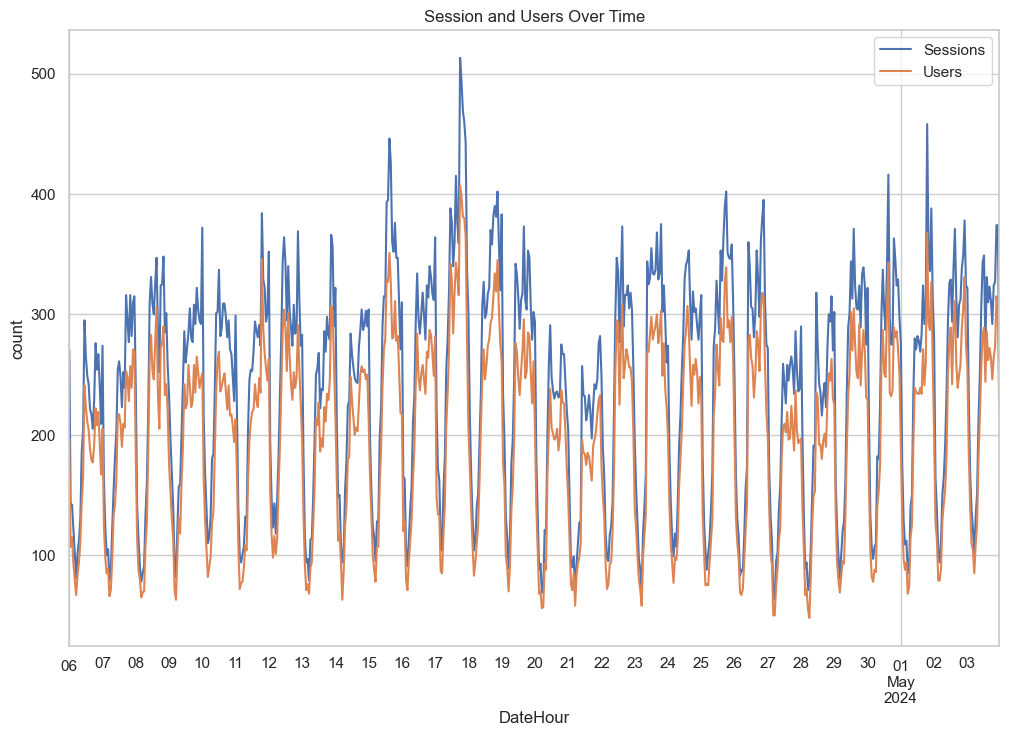

In [22]:
plt.figure(figsize = (12,8))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax= plt.gca())
plt.title("Session and Users Over Time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

# Total users by channel

C:\Users\asus\AppData\Local\Temp\ipykernel_15008\2506431998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "channel group", y = "Users", data = df , estimator = np.sum,


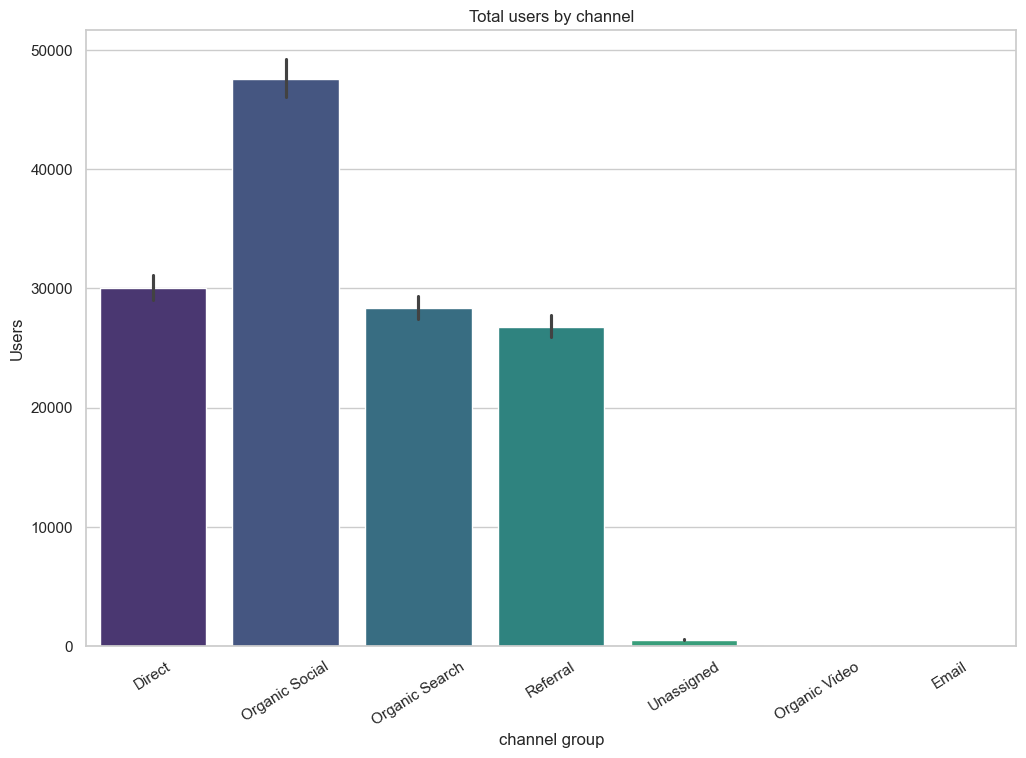

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(x = "channel group", y = "Users", data = df , estimator = np.sum,
            palette = "viridis")
plt.title("Total users by channel")
plt.xticks(rotation = 32)

plt.show()

# Engagement Rate Distribution by channel

C:\Users\asus\AppData\Local\Temp\ipykernel_15008\2356929642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "channel group", y = "Engagement rate", data = df ,


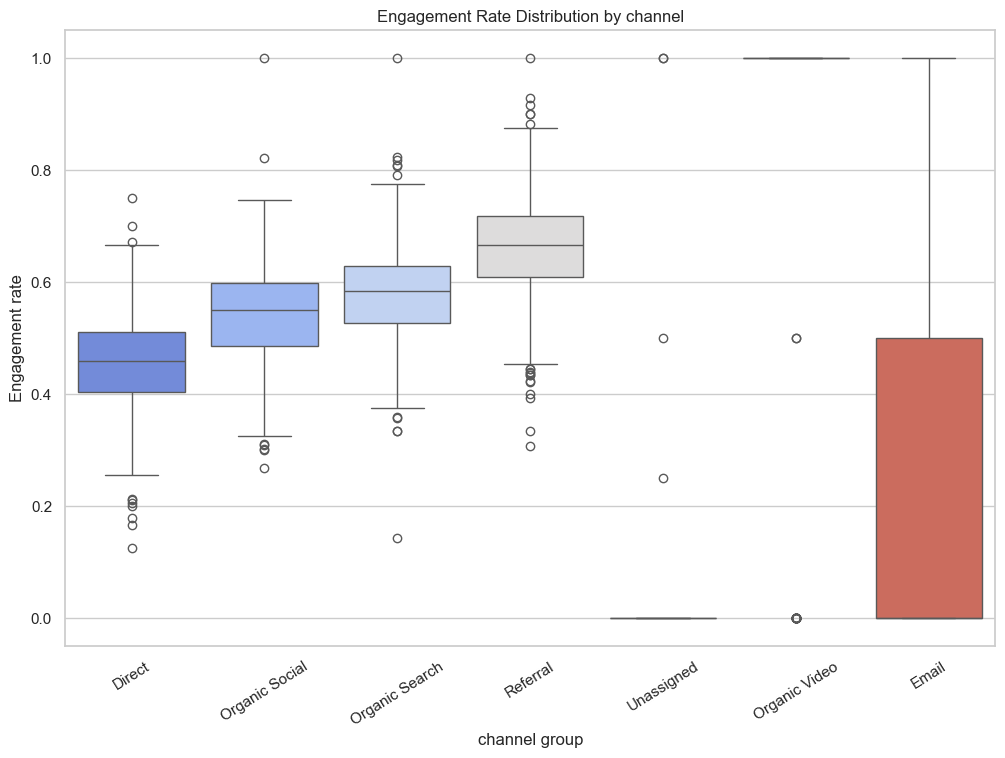

In [27]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "channel group", y = "Engagement rate", data = df ,
            palette = "coolwarm")
plt.title("Engagement Rate Distribution by channel")
plt.xticks(rotation = 32)

plt.show()

# Engaged vs non Engaged sessions

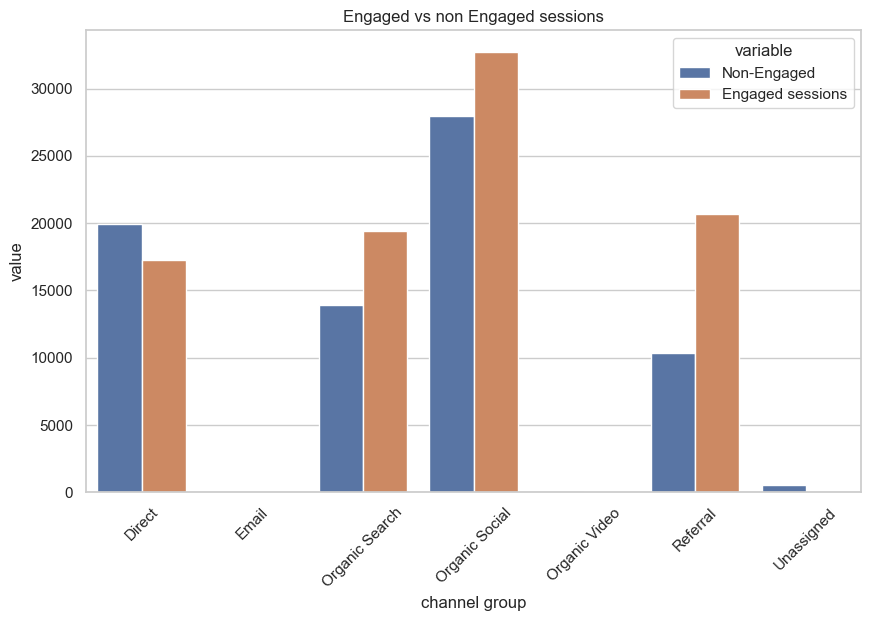

In [41]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
sesion_df_melted = session_df.melt(id_vars = "channel group", value_vars = ["Non-Engaged", "Engaged sessions"])

plt.figure(figsize = (10,6))
sns.barplot(data = sesion_df_melted, x ="channel group", y= "value", hue = "variable")
plt.title("Engaged vs non Engaged sessions")
plt.xticks(rotation = 45)
plt.show()

# traffic by hour and channel

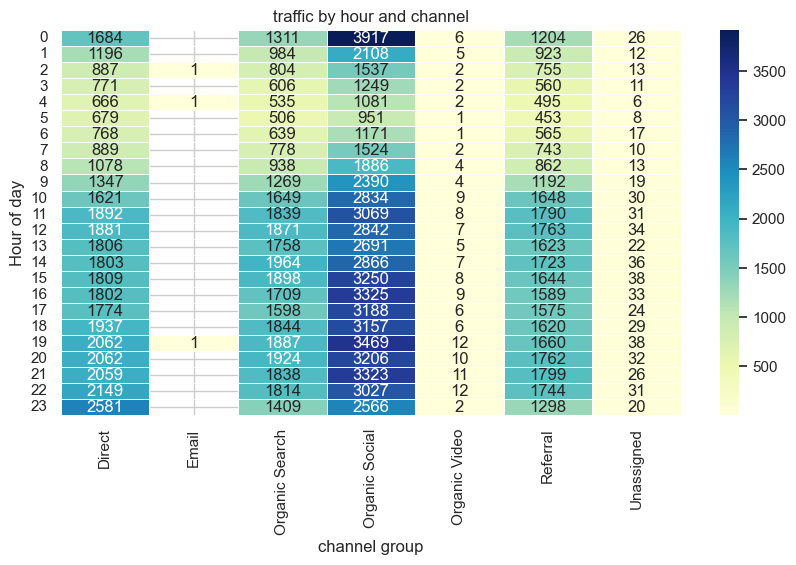

In [47]:
traffic_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()
plt.figure(figsize = (10,5))
sns.heatmap(traffic_data, cmap = "YlGnBu", linewidths = 0.5, annot = True, fmt = '.0f')
plt.title("traffic by hour and channel")
plt.xlabel("channel group")
plt.ylabel("Hour of day")
plt.show()

# engagement rate vs sessions over time

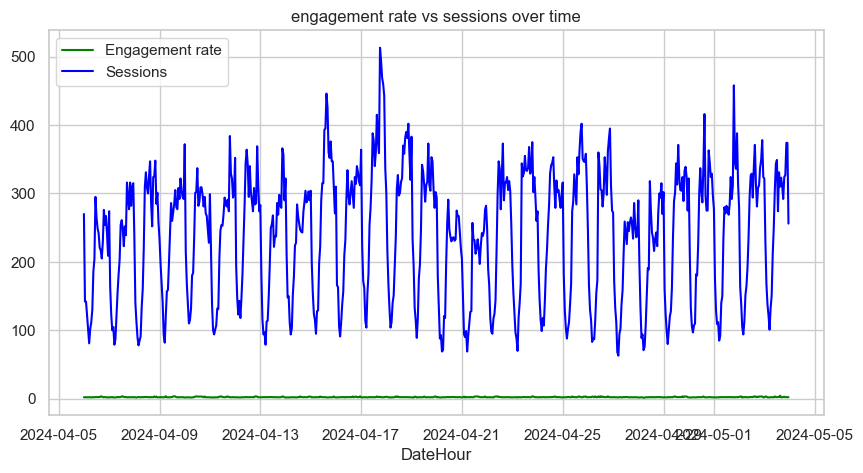

In [50]:
data = df.groupby("DateHour")[["Sessions", "Engagement rate"]].sum().reset_index()

plt.figure(figsize = (10,5))
plt.plot(data["DateHour"], data["Engagement rate"], label = "Engagement rate", color = "green")
plt.plot(data["DateHour"], data["Sessions"], label = "Sessions", color = "blue")

plt.title("engagement rate vs sessions over time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()